# Bow-tie model of the web

In [58]:
import networkx as nx
import pandas as pd
from collections import defaultdict
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
#matplotlib.rc("savefig", dpi=300)


## 1. Using the data of the first day

In [18]:
with open("/Users/chengjun/bigdata/phonedata/tb_sms_201202.txt") as f:
    dat = f.readlines(100000000) 

In [19]:
len(dat)

2354117

In [45]:
data_dict = defaultdict(int)
for i in dat:
    date, p1, p2 = i.split("\t")[:3]
    if date == "20120201":
        data_dict[p1+'\t'+p2] += 1
    else:
        break   

In [47]:
data_dict.keys()[:3], data_dict.values()[:3]

(['852435\ty20994287630', '1321747\t899894', '711720\ty27672031570'],
 [1, 2, 2])

In [32]:
# data = pd.DataFrame(data_list, columns=['from', 'to'])

In [48]:
G = nx.Graph()
for i in data_dict.keys():
    x, y = i.split('\t')
    G.add_edge(x,y)

In [49]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 131050\nNumber of edges: 83335\nAverage degree:   1.2718'

In [52]:
def powerPlot(data):
    d = sorted(data, reverse = True )
    d_table = defaultdict(int)
    for k in d:
        d_table[k] += 1
    d_value = sorted(d_table)
    d_freq = [d_table[i] for i in d_value]
    d_prob = [float(i)/sum(d_freq) for i in d_freq]
    #d_rank = ss.rankdata(d_value).astype(int)
    x = np.log(d_value)
    y = np.log(d_prob)
    xx = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,xx).fit()
    constant,beta = res.params
    r2 = res.rsquared
    plt.plot(d_value, d_prob, 'ro')
    plt.plot(d_value, np.exp(constant+x*beta),"red")
    plt.xscale('log'); plt.yscale('log')
    plt.text(max(d_value)/5,max(d_prob)/5,
             'Beta = ' + str(round(beta,2)) +'\n' + 'R squared = ' + str(round(r2, 2)))
    plt.title('Size Distribution')
    plt.ylabel('Probability')
    plt.xlabel('Size')
    plt.show()    
    
def powerRankPlot(data):
    t = np.array(sorted(data,key=lambda x:-x))
    r = np.array(range(len(data))) +1
    x = np.log(r)
    y = np.log(t)
    xx = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,xx).fit()
    constant, beta = res.params
    r2 = res.rsquared
    plt.plot(r,t, "o",color='b',markersize=5)
    plt.plot(r, np.exp(constant+x*beta),"red")
    plt.text(min(r)+(max(r)-min(r))/10, min(t)+(max(t)-min(t))/2,  
             'Beta = ' + str(np.round(beta,2)) + '\n' + 'R squared = ' + str(np.round(r2, 2)))
    plt.xscale('log'); plt.yscale('log')
    plt.xlabel(r'Rank')
    plt.ylabel(r'Frequency')

In [65]:
degree = nx.degree(G)

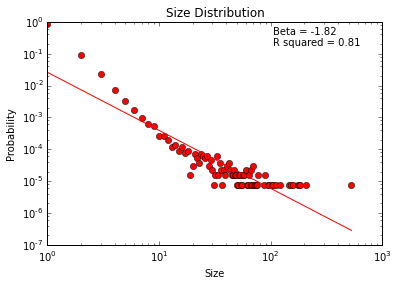

In [69]:
powerPlot(degree.values())

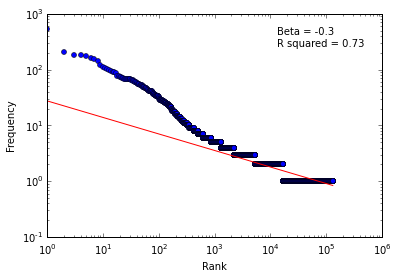

In [70]:
powerRankPlot(degree.values())

## 2. Breadth-first searching

In [128]:
# 0-1, 2; 1-3, 4; 2-3, 5
G1 = nx.DiGraph()
G1.add_edge(0, 1)
G1.add_edge(0, 2)
G1.add_edge(1, 3)
G1.add_edge(1, 4)
G1.add_edge(2, 3)
G1.add_edge(3, 2)
G1.add_edge(2, 0)
G1.add_edge(2, 5)
G1.add_edge(6, 0)
G1.add_edge(0, 6)

print nx.bfs_successors(G1,0)

{0: [1, 2, 6], 1: [3, 4], 2: [5]}


[(0, 1), (0, 2), (1, 3), (1, 4), (2, 5)]


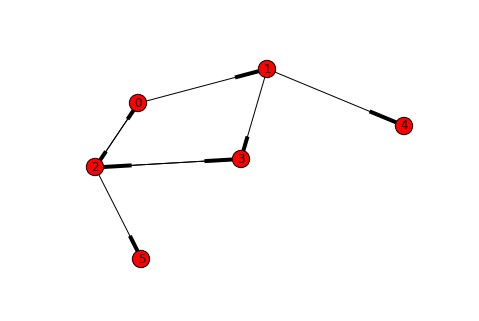

In [94]:
nx.draw(G1, with_labels = True)

# in --> scc --> out

inversed directions - scc = in
right directions - scc = out
initial seed should come back to itself: circles.
How to find a circle.

In [133]:
paths = list(nx.all_simple_paths(G1, source=0, target=0))
#[i for i in [len(p) for p in paths] if i > 3]

In [134]:
paths

[[0, 1, 3, 2, 0], [0, 2, 0], [0, 6, 0]]

In [122]:
for i in range(6):
    if (list(nx.all_simple_paths(G1, source=i, target=i))) == []:
        print i

4
5


In [152]:
import sys 
def flushPrint(variable):
    if variable %10^2 == 0:
        sys.stdout.write('\r')
        sys.stdout.write('%s' % variable)
        sys.stdout.flush()
    
    
    
def find_seed(G):
    n = 0
    for i in G.nodes():
        n += 1
        flushPrint(n)
        paths = list(nx.all_simple_paths(G, source=i, target=i))
        paths_length = [len(p) for p in paths]
        circles = [j for j in paths_length if j > 3]
        if circles != []:
            break
    return i

In [138]:
G1.nodes()

[0, 1, 2, 3, 4, 5, 6]

In [154]:
find_seed(G1)

0